In [25]:
library(iMKT)
library(dplyr)  
library(data.table)
source('/home/jmurga/mkt/201902/scripts/src/concatenation.R')
source('/home/jmurga/mkt/201902/scripts/src/plotStyle.R')
PopFlyData <- fread('/home/jmurga/mkt/201902/results/dmelData.tab', header = T, sep = "\t")
PopHumanData <- fread('/home/jmurga/mkt/201902/results/humanData.tab', header = T, sep = "\t")

[1] 27506    12

In [26]:
options(repr.plot.width=7, repr.plot.height=7)

### Resampling analysis

#### Raleigh

In [ ]:
genes <- unique(PopFlyData[['id']]) %>% as.matrix()

In [ ]:
set.seed(13753)
subsetGenes <- sample(genes,size=1000)

 ##### Boot samples bins 1 

In [126]:
bootSamplesBin1 <- samplingGenes(geneList = subsetGenes,B=3500,bins=1)

In [ ]:
outputRAL1 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin1,bins = 1,population='RAL')

##### Boot samples bins 2

In [25]:
bootSamplesBin2 <- samplingGenes(geneList = subsetGenes,B=3500,bins=2)

In [ ]:
outputRAL2 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin2,bins = 2,population='RAL')

##### Boot samples bins 5

In [25]:
bootSamplesBin5 <- samplingGenes(geneList = subsetGenes,B=3500,bins=5)

In [ ]:
outputRAL5 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin2,bins = 5,population='RAL')

##### Boot samples bins 10

In [25]:
bootSamplesBin10 <- samplingGenes(geneList = subsetGenes,B=3500,bins=10)

In [ ]:
outputRAL10 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin2,bins = 10,population='RAL')

##### Boot samples bins 25

In [25]:
bootSamplesBin25 <- samplingGenes(geneList = subsetGenes,B=3500,bins=25)

In [ ]:
outputRAL25 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin2,bins = 25,population='RAL')

##### Boot samples bins 50

In [25]:
bootSamplesBin50 <- samplingGenes(geneList = subsetGenes,B=3500,bins=50)

In [ ]:
outputRAL50 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin2,bins = 50,population='RAL')

##### Boot samples bins 75

In [ ]:
bootSamplesBin75 <- samplingGenes(geneList = subsetGenes,B=3500,bins=75 )

In [ ]:
outputRAL75 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin75,bins = 75,population='RAL')

##### Boot samples bins 100

In [25]:
bootSamplesBin100 <- samplingGenes(geneList = subsetGenes,B=3500,bins=100)

In [ ]:
outputRAL100 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin2,bins = 100,population='RAL')

##### Boot samples bins 250

In [25]:
bootSamplesBin250<- samplingGenes(geneList = subsetGenes,B=3500,bins=250)

In [ ]:
outputRAL250 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin2,bins = 250,population='RAL')

##### Boot samples bins 500

In [25]:
bootSamplesBin500 <- samplingGenes(geneList = subsetGenes,B=3500,bins=500)

In [ ]:
outputRAL500 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin500,bins = 500,population='RAL')

##### Boot samples bins 750

In [ ]:
bootSamplesBin750 <- samplingGenes(geneList = subsetGenes,B=3500,bins=750)

In [ ]:
outputRAL750 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin750,bins = 750,population='RAL')

##### Boot samples bins 1000

##### Plot

In [9]:
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL1.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL2.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL5.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL10.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL25.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL50.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL75.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL100.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL250.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL500.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL750.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRAL1000.RData')

In [28]:
options(repr.plot.width=7, repr.plot.height=7)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Removed 1558 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1558 rows containing non-finite values (stat_summary).”

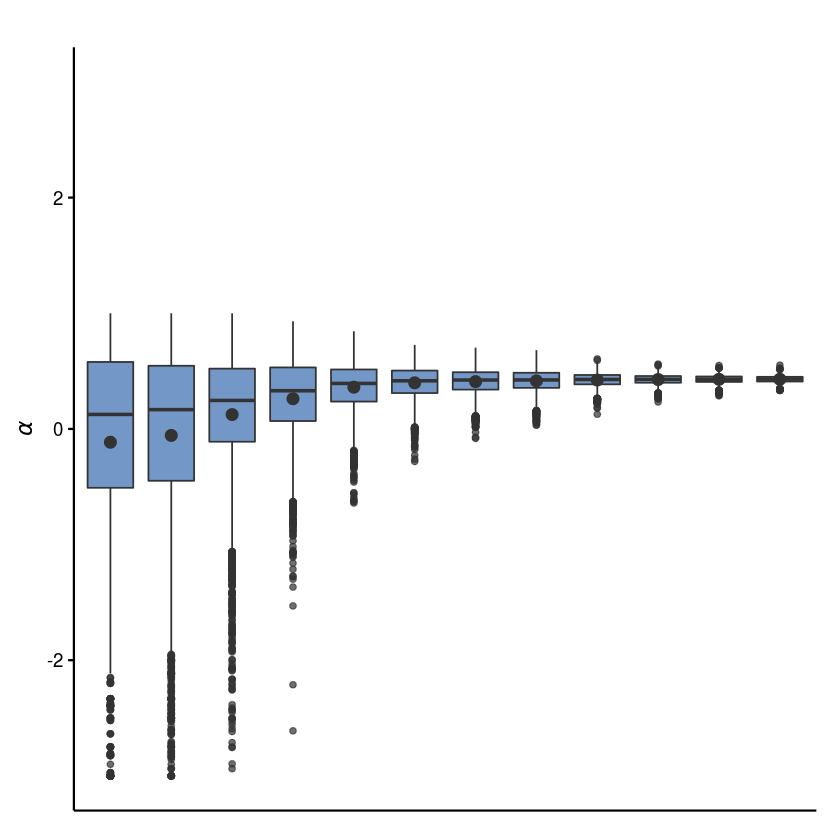

In [29]:
dataPlot<- rbind(outputRAL1,
                outputRAL2,
                outputRAL5,
                outputRAL10,
                outputRAL25,
                outputRAL50,
                outputRAL75,
                outputRAL100,
                outputRAL250,
                outputRAL500,
                outputRAL750,
                outputRAL1000)


dataPlot$bin <- factor(dataPlot$bin, levels = unique(dataPlot$bin))

boxPlotConcatRal <- ggplot(dataPlot,
                           aes(x = bin, y = alphaDGRP0.05)) + #" alphaStandard" "alphaDGRP0.05" "alphaDGRP0.15" "alphaFWW0.05"  "alphaFWW0.15" "resultiMK"
                           geom_boxplot(color="grey20",alpha=0.7,fill="#386cb0") +    
                           labs(x = "Bins", y=expression(italic(α))) +
                           themePublication() + scaleFillPublication() +
                           scale_y_continuous(breaks = pretty(dataPlot$alphaStandard, n = 5)) +
                           stat_summary(fun.y=mean, colour="grey20", geom="point", size=3) +
                           theme(axis.title.x = element_blank(), axis.ticks.x = element_blank(), axis.text.x = element_blank()) + ylim(c(-3,3))
boxPlotConcatRal

In [ ]:
## el plot del num de bins analizables solo tiene sentido en el asimptotico
library(cowplot)
bin <- rep(c(1,2,5,10,25,50,75,100,250,500,750,1000),2)
type <- sort(rep(c(T,F),12), decreasing = T)

# las fraciones las calcule a mano xo seria ver table(is.na(outputRAL25$alphaAsymptotic)/100) etc.

fractions <- c(0.002,0.0054,0.030,0.152,0.616,0.860,0.930,0.975,1,1,1,1,
               0.998,0.9946,0.970,0.848,0.384,0.140,0.070,0.025,0,0,0,0)
fraction <- data.frame(bin,fractions,type)

plotFraction <- ggplot(fraction) +
                       geom_bar(stat="identity", aes_string(x=as.factor(bin), y=fractions, fill=type), color="black") +
                       themePublication() + 
                       ylab(label="Fraction") + xlab(label="Bins")  + 
                       scaleFillPublication(name="Number of analyzable bins") +
                       theme(axis.line=element_blank())
plotFraction

plot_grid(boxPlotConcatRal,plotFraction,ncol = 1,rel_heights = c(1,0.25))

#### CEU

In [ ]:
genes <- unique(PopHumanData[['id']]) %>% as.matrix()

In [ ]:
set.seed(13753)
subsetGenes <- sample(genes,size=1000)

 ##### Boot samples bins 1 

In [126]:
bootSamplesBin1 <- samplingGenes(geneList = subsetGenes,B=3500,bins=1)

In [ ]:
outputCEU1 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin1,bins = 1,population='CEU')

##### Boot samples bins 2

In [25]:
bootSamplesBin2 <- samplingGenes(geneList = subsetGenes,B=3500,bins=2)

In [ ]:
outputCEU2 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin2,bins = 2,population='CEU')

##### Boot samples bins 5

In [25]:
bootSamplesBin5 <- samplingGenes(geneList = subsetGenes,B=3500,bins=5)

In [ ]:
outputCEU5 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin2,bins = 5,population='CEU')

##### Boot samples bins 10

In [25]:
bootSamplesBin10 <- samplingGenes(geneList = subsetGenes,B=3500,bins=10)

In [ ]:
outputCEU10 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin2,bins = 10,population='CEU')

##### Boot samples bins 25

In [25]:
bootSamplesBin25 <- samplingGenes(geneList = subsetGenes,B=3500,bins=25)

In [ ]:
outputCEU25 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin2,bins = 25,population='CEU')

##### Boot samples bins 50

In [25]:
bootSamplesBin50 <- samplingGenes(geneList = subsetGenes,B=3500,bins=50)

In [ ]:
outputCEU50 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin2,bins = 50,population='CEU')

##### Boot samples bins 75

In [25]:
bootSamplesBin75 <- samplingGenes(geneList = subsetGenes,B=3500,bins=75)

In [ ]:
outputCEU75 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin75,bins = 75,population='CEU')

##### Boot samples bins 100

In [25]:
bootSamplesBin100 <- samplingGenes(geneList = subsetGenes,B=3500,bins=100)

In [ ]:
outputCEU100 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin2,bins = 100,population='CEU')

##### Boot samples bins 250

In [25]:
bootSamplesBin250<- samplingGenes(geneList = subsetGenes,B=3500,bins=250)

In [ ]:
outputCEU250 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin2,bins = 250,population='CEU')

##### Boot samples bins 500

In [25]:
bootSamplesBin500 <- samplingGenes(geneList = subsetGenes,B=3500,bins=500)

In [ ]:
outputCEU500 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin2,bins = 500,population='CEU')

##### Boot samples bins 750

In [25]:
bootSamplesBin750<- samplingGenes(geneList = subsetGenes,B=3500,bins=500)

In [ ]:
outputCEU750 <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesBin750,bins = 500,population='CEU')

##### Boot samples bins 1000

In [25]:
bootSamplesBin1000 <- samplingGenes(geneList = subsetGenes,B=3500,bins=1000)

In [ ]:
output1000 <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesBin2,bins = 1000,population='RAL')

### Recombination bins analysis

#### *D. melanogaster* analysis

In [6]:
RalData <- subset(PopFlyData, PopFlyData$pop == "RAL")
# Divide genes into five equally sized groups depending on their recombination rates
RalData$recQuartile <- with(RalData, cut(recomb, breaks=quantile(recomb,probs=seq(0,1, by=0.2), na.rm=TRUE), include.lowest=TRUE))

genesRec1 <- subset(RalData,RalData$recQuartile==unique(sort(RalData$recQuartile))[1])
genesRec2 <- subset(RalData,RalData$recQuartile==unique(sort(RalData$recQuartile))[2])
genesRec3 <- subset(RalData,RalData$recQuartile==unique(sort(RalData$recQuartile))[3])
genesRec4 <- subset(RalData,RalData$recQuartile==unique(sort(RalData$recQuartile))[4])
genesRec5 <- subset(RalData,RalData$recQuartile==unique(sort(RalData$recQuartile))[5])

##### Ral analysis

In [ ]:
bootSamplesRec1 <- samplingGenes(geneList = genesRec1$id,B=1000,bins=length(genesRec1$id))
outputRec1RAL <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec1,bins = 1000,population='RAL')

bootSamplesRec2 <- samplingGenes(geneList = genesRec2$id,B=1000,bins=length(genesRec2$id))
outputRec2RAL <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec2,bins = 1000,population='RAL')

bootSamplesRec3 <- samplingGenes(geneList = genesRec3$id,B=1000,bins=length(genesRec3$id))
outputRec3RAL <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec3,bins = 1000,population='RAL')

bootSamplesRec4 <- samplingGenes(geneList = genesRec4$id,B=1000,bins=length(genesRec4$id))
outputRec4RAL <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec4,bins = 1000,population='RAL')

bootSamplesRec5 <- samplingGenes(geneList = genesRec5$id,B=1000,bins=length(genesRec5$id))
outputRec5RAL <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec5,bins = 1000,population='RAL')

In [ ]:
save(outputRec1RAL,file='/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec1Ral.RData')
save(outputRec2RAL,file='/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec2Ral.RData')
save(outputRec3RAL,file='/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec3Ral.RData')
save(outputRec4RAL,file='/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec4Ral.RData')
save(outputRec5RAL,file='/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec5Ral.RData')

**Plot**

In [ ]:
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec1Ral.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec2Ral.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec3Ral.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec4Ral.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec5Ral.RData') 

In [ ]:
outputRec1RAL$group <- 1
outputRec2RAL$group <- 2
outputRec3RAL$group <- 3
outputRec4RAL$group <- 4
outputRec5RAL$group <- 5

outputRecTotal <- rbind(outputRec1RAL,outputRec2RAL,outputRec3RAL,outputRec4RAL,outputRec5RAL)

dataPlot <- melt(outputRecTotal,id=c("group"),measure.vars = c('alphaStandard','alphaFWW0.05','alphaFWW0.15','alphaDGRP0.05','alphaDGRP0.15','alphaiMKT'))

# group = recombination category; value = alpha; variable = mkt method

plotRecombinationRAL <- ggplot(dataPlot, aes(x = as.factor(group), y = value, fill =variable)) + 
    geom_boxplot( color = "grey20",alpha = 0.7) +
themePublication() +
labs(x = "Recombination categories in Raleigh population", y = expression(italic(α))) + 
scale_y_continuous(breaks = pretty(dataPlot$value, n = 8))  + 
    scale_x_discrete(name = "Recombination rate categories", labels = c("1" = "[0,0.653]", "2" = "(0.653,1.52]", "3" = "(1.52,2.39]", "4" = "(2.39,3.58]", "5" = "(3.58,14.8]")) + 
    theme(legend.justification=c(1,1), legend.position = "right", legend.direction = "vertical",  legend.key.size = unit(1, 'lines')) +
scaleFillPublication(name="Method", labels = c("alphaStandard" = "MKT standard", "alphaDGRP0.05" = "MKT DGRP 5%", "alphaDGRP0.15" = "MKT DGRP 10%", "alphaFWW0.05" = "MKT FWW 5%", "alphaFWW0.15" = "MKT FWW 10%","alphaiMK" = "iMKT"))+

ggsave(plotRecombinationRAL,file='/home/jmurga/mkt/201902/results/concatenation/binRecomb/recombRAL.png',dpi=300,width = 10,height = 10)


##### Zi analysis

In [ ]:
bootSamplesRec1 <- samplingGenes(geneList = genesRec1$id,B=1000,bins=length(genesRec1$id))
outputRec1Zi <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec1,bins = 1000,population='ZI')

bootSamplesRec2 <- samplingGenes(geneList = genesRec2$id,B=1000,bins=length(genesRec2$id))
outputRec2Zi <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec2,bins = 1000,population='ZI')

bootSamplesRec3 <- samplingGenes(geneList = genesRec3$id,B=1000,bins=length(genesRec3$id))
outputRec3Zi <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec3,bins = 1000,population='ZI')

bootSamplesRec4 <- samplingGenes(geneList = genesRec4$id,B=1000,bins=length(genesRec4$id))
outputRec4Zi <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec4,bins = 1000,population='ZI')

bootSamplesRec5 <- samplingGenes(geneList = genesRec5$id,B=1000,bins=length(genesRec5$id))
outputRec5Zi <- sampleAnalysis(data=PopFlyData,sampling = bootSamplesRec5,bins = 1000,population='ZI')

#### Human data

In [19]:
# CEU POPULATION
CeuData <- subset(PopHumanData, PopHumanData$pop == "CEU")

# CEUData genes into five equally sized groups depending on their recombination rates
CeuData$recQuartile <- with(CeuData, cut(recomb, breaks=quantile(recomb,probs=seq(0,1, by=0.2), na.rm=TRUE), include.lowest=TRUE))

genesRec1 <- subset(CeuData,CeuData$recQuartile==unique(sort(CeuData$recQuartile))[1])
genesRec2 <- subset(CeuData,CeuData$recQuartile==unique(sort(CeuData$recQuartile))[2])
genesRec3 <- subset(CeuData,CeuData$recQuartile==unique(sort(CeuData$recQuartile))[3])
genesRec4 <- subset(CeuData,CeuData$recQuartile==unique(sort(CeuData$recQuartile))[4])
genesRec5 <- subset(CeuData,CeuData$recQuartile==unique(sort(CeuData$recQuartile))[5])


##### CEU analysis

In [ ]:
bootSamplesRec1 <- samplingGenes(geneList = genesRec1$id,B=1000,bins=length(genesRec1$id))
outputRec1CEU <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec1,bins = 1000,population='CEU')

bootSamplesRec2 <- samplingGenes(geneList = genesRec2$id,B=1000,bins=length(genesRec2$id))
outputRec2CEU <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec2,bins = 1000,population='CEU')

bootSamplesRec3 <- samplingGenes(geneList = genesRec3$id,B=1000,bins=length(genesRec3$id))
outputRec3CEU <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec3,bins = 1000,population='CEU')

bootSamplesRec4 <- samplingGenes(geneList = genesRec4$id,B=1000,bins=length(genesRec4$id))
outputRec4CEU <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec4,bins = 1000,population='CEU')

bootSamplesRec5 <- samplingGenes(geneList = genesRec5$id,B=1000,bins=length(genesRec5$id))
outputRec5CEU <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec5,bins = 1000,population='CEU')

##### YRI analysis

In [ ]:
bootSamplesRec1 <- samplingGenes(geneList = genesRec1$id,B=1000,bins=length(genesRec1$Name))
outputRec1Yri <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec1,bins = 1000,population='YRI')

bootSamplesRec2 <- samplingGenes(geneList = genesRec2$id,B=1000,bins=length(genesRec2$Name))
outputRec2Yri <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec2,bins = 1000,population='YRI')

bootSamplesRec3 <- samplingGenes(geneList = genesRec3$id,B=1000,bins=length(genesRec3$Name))
outputRec3Yri <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec3,bins = 1000,population='YRI')

bootSamplesRec4 <- samplingGenes(geneList = genesRec4$id,B=1000,bins=length(genesRec4$Name))
outputRec4Yri <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec4,bins = 1000,population='YRI')

bootSamplesRec5 <- samplingGenes(geneList = genesRec5$id,B=1000,bins=length(genesRec5$Name))
outputRec5Yri <- sampleAnalysis(data=PopHumanData,sampling = bootSamplesRec5,bins = 1000,population='YRI')

##### Plot

In [ ]:
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec1Ceu.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec2Ceu.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec3Ceu.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec4Ceu.RData')
load(file = '/home/jmurga/mkt/201902/results/concatenation/binRecomb/outputRec5Ceu.RData')

In [ ]:
outputRec1CEU$group <- 1
outputRec2CEU$group <- 2
outputRec3CEU$group <- 3
outputRec4CEU$group <- 4
outputRec5CEU$group <- 5

outputRecTotal <- rbind(outputRec1CEU,outputRec2CEU,outputRec3CEU,outputRec4CEU,outputRec5CEU)

dataPlot <- melt(outputRecTotal,id=c("group"),measure.vars = c('alphaStandard','alphaFWW0.05','alphaFWW0.15','alphaDGRP0.05','alphaDGRP0.15','alphaiMKT'))

# group = recombination category; value = alpha; variable = mkt method

plotRecombinationCEU <- ggplot(dataPlot, aes(x = as.factor(group), y = value, fill =variable)) + 
    geom_boxplot( color = "grey20",alpha = 0.7) +
    labs(x = "Recombination categories", y = expression(italic(α))) +
themePublication() +
    scaleFillPublication(name="Method", labels = c("alphaStandard" = "MKT standard", "alphaDGRP0.05" = "MKT DGRP 5%", "alphaDGRP0.15" = "MKT DGRP 10%", "alphaFWW0.05" = "MKT FWW 5%", "alphaFWW0.15" = "MKT FWW 10%","alphaiMK" = "iMKT","alphaasym" = "Asymptotic MKT","DFE_alpha" = "DFE-alpha")) + 
scale_y_continuous(breaks = pretty(dataPlot$value, n = 8))  + 
    scale_x_discrete(name = "Recombination rate categories", labels = c("1" = "[0,0.653]", "2" = "(0.653,1.52]", "3" = "(1.52,2.39]", "4" = "(2.39,3.58]", "5" = "(3.58,14.8]")) + 
    theme(legend.justification=c(1,1), legend.position = "right", legend.direction = "vertical",  legend.key.size = unit(1, 'lines'))
ggsave(plotRecombinationCEU,file='/home/jmurga/mkt/201902/results/concatenation/binRecomb/recombCEU.png',dpi=300,height = 14,width = 14)   